### ***Initializing and Importing Packages***

In [2]:
using Plots, DataFrames, StatsBase, Plots.PlotMeasures, LaTeXStrings, CSV, JLD, ProgressMeter, Dates

DataDir = "../../Data/"
FigsDir = "../../Figs/"

include("Mods.jl")

theme(:dark)
Plots.default(titlefontsize=12, tickfontsize=10, labelfontsize=12, legendfontsize=9,
    rightmargin=5mm, bottommargin=5mm, topmargin=5mm, leftmargin=5mm,
    fontfamily="Computer Modern", frame=:box, label=nothing)

### ***Import data***

In [3]:
DataBTC = StatsMods.LoadData("BTC"; Period="5MIN");
DataETH = StatsMods.LoadData("ETH"; Period="5MIN");
DataXRP = StatsMods.LoadData("XRP"; Period="5MIN");
DataSOL = StatsMods.LoadData("SOL"; Period="5MIN");
DataADA = StatsMods.LoadData("ADA"; Period="5MIN");

### ***Results***

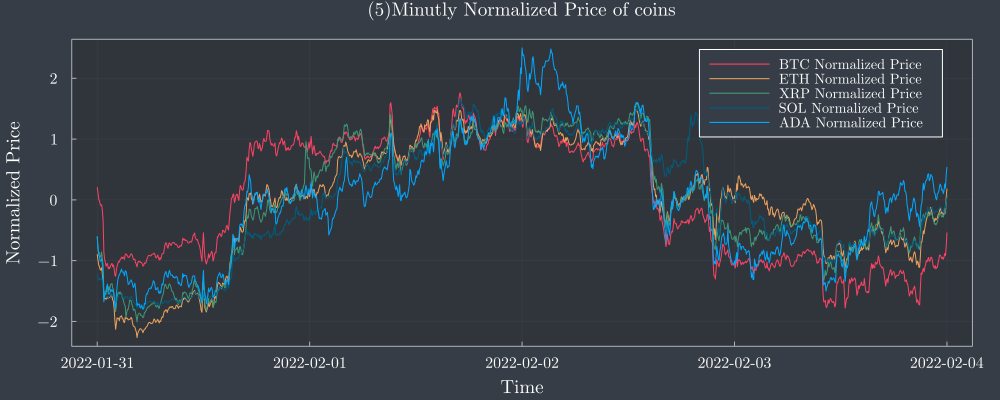

In [4]:
plot(DataBTC[4], DataBTC[3], label ="BTC Normalized Price")
plot!(DataETH[4], DataETH[3], label="ETH Normalized Price")
plot!(DataXRP[4], DataXRP[3], label="XRP Normalized Price")
plot!(DataSOL[4], DataSOL[3], label="SOL Normalized Price")
plot!(DataADA[4], DataADA[3], label="ADA Normalized Price")
plot!(title = "(5)Minutly Normalized Price of coins", xlab = "Time", ylab = "Normalized Price", size = (1000, 400))

In [5]:
LMT = 10
ND = length(DataBTC[3])
BTCMEANDATA = [mean(DataBTC[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
ETHMEANDATA = [mean(DataETH[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
XRPMEANDATA = [mean(DataXRP[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
SOLMEANDATA = [mean(DataSOL[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
ADAMEANDATA = [mean(DataADA[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];

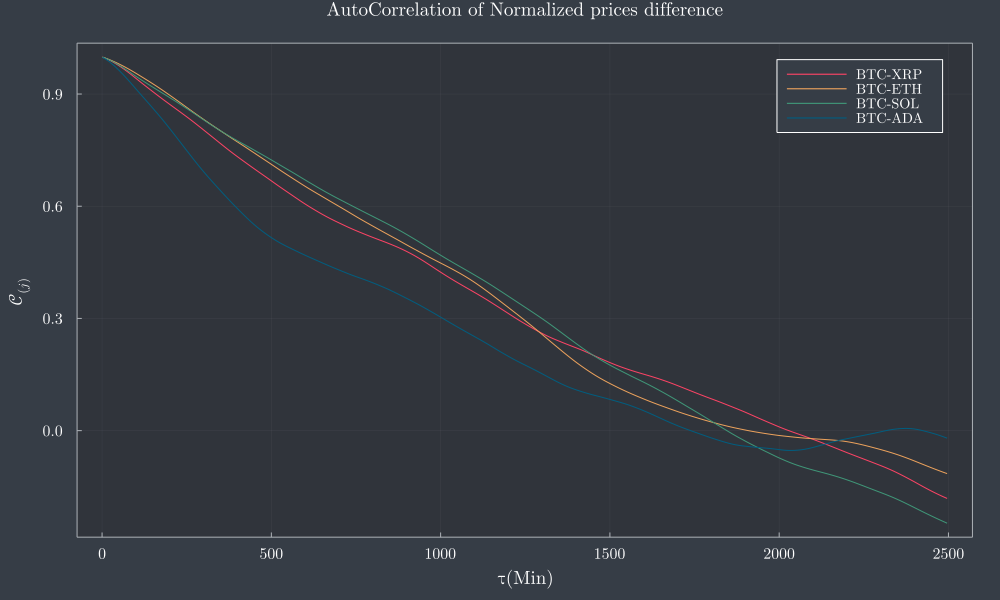

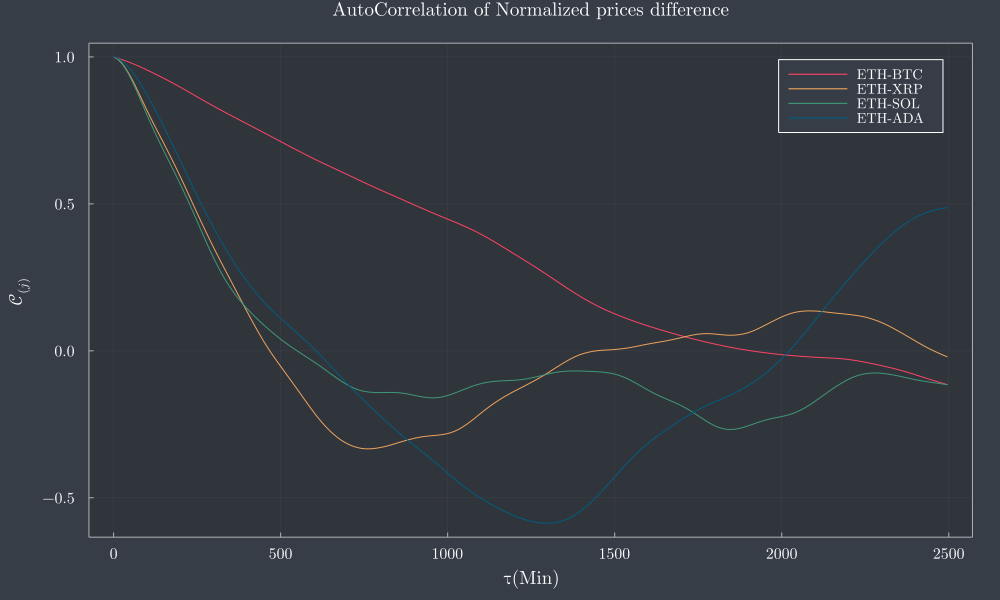

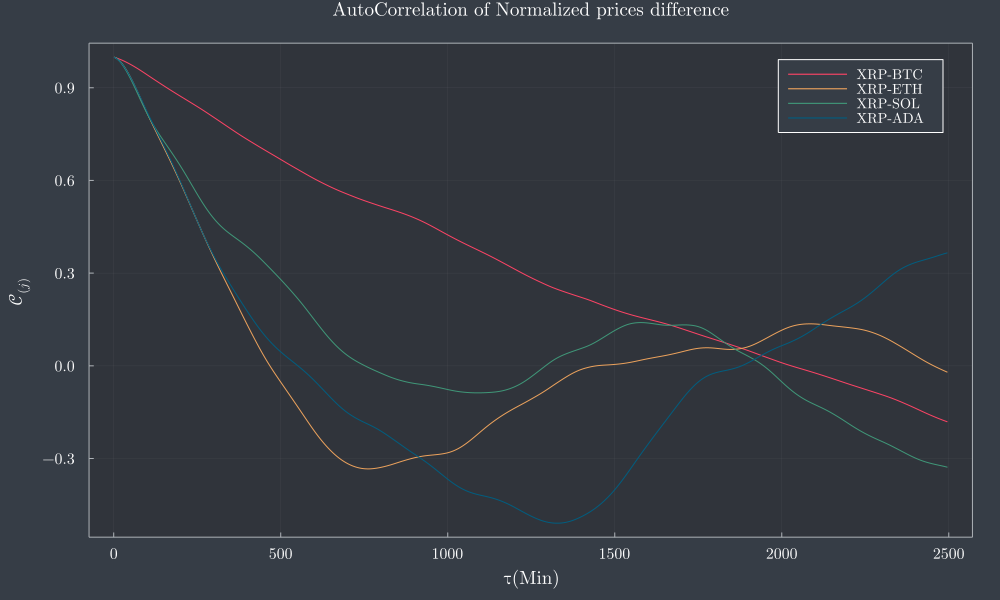

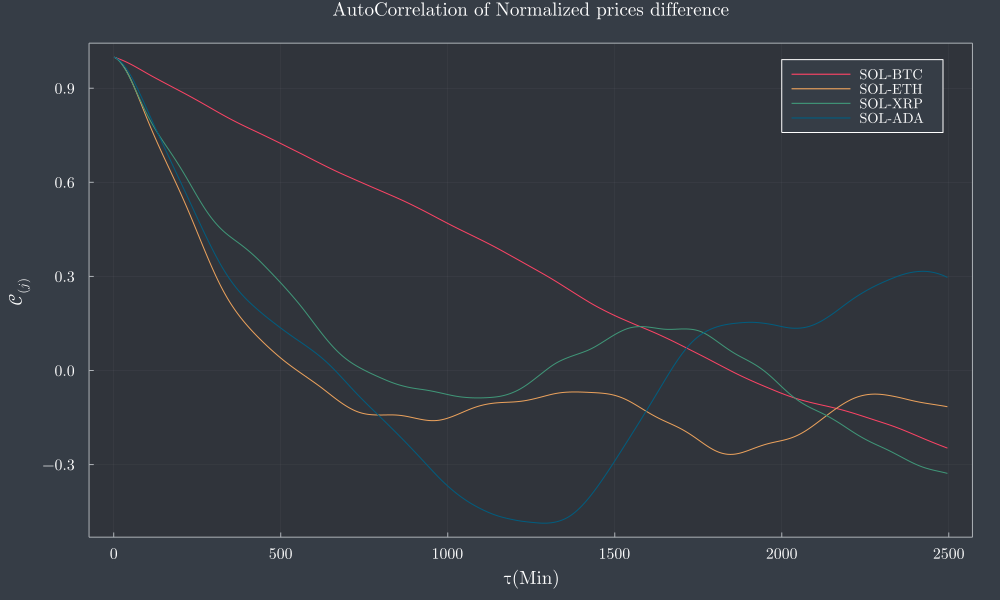

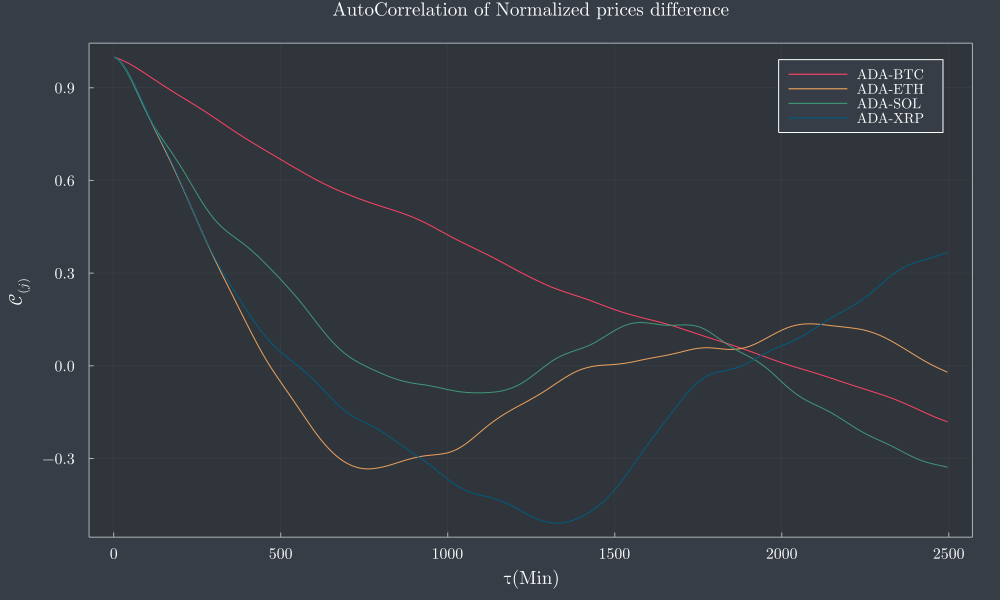

In [6]:
EndTime = 500
MinSpan = 1:5:5*EndTime

BTCPlot = begin
    plot(MinSpan, autocor(BTCMEANDATA .- XRPMEANDATA, 1:EndTime), label="BTC-XRP")
    plot!(MinSpan, autocor(BTCMEANDATA .- ETHMEANDATA, 1:EndTime), label="BTC-ETH")
    plot!(MinSpan, autocor(BTCMEANDATA .- SOLMEANDATA, 1:EndTime), label="BTC-SOL")
    plot!(MinSpan, autocor(BTCMEANDATA .- ADAMEANDATA, 1:EndTime), label="BTC-ADA")
    plot!(title="AutoCorrelation of Normalized prices difference", xlab="τ(Min)",
        ylab=L"\mathcal{C}_{(j)}", size=(1000, 600),
        leftmargin=5mm, rightmargin=5mm, bottommargin=5mm, topmargin=5mm)
end
savefig(BTCPlot, FigsDir * "S5-BTCPlot.pdf")
display(BTCPlot)

ETHPlot = begin
    plot(MinSpan, autocor(ETHMEANDATA .- BTCMEANDATA, 1:EndTime), label="ETH-BTC")
    plot!(MinSpan, autocor(ETHMEANDATA .- XRPMEANDATA, 1:EndTime), label="ETH-XRP")
    plot!(MinSpan, autocor(ETHMEANDATA .- SOLMEANDATA, 1:EndTime), label="ETH-SOL")
    plot!(MinSpan, autocor(ETHMEANDATA .- ADAMEANDATA, 1:EndTime), label="ETH-ADA")
    plot!(title="AutoCorrelation of Normalized prices difference", xlab="τ(Min)",
        ylab=L"\mathcal{C}_{(j)}", size=(1000, 600),
        leftmargin=5mm, rightmargin=5mm, bottommargin=5mm, topmargin=5mm)
end
savefig(ETHPlot, FigsDir * "S5-ETHPlot.pdf")
display(ETHPlot)

XRPPlot = begin
    plot(MinSpan, autocor(XRPMEANDATA .- BTCMEANDATA, 1:EndTime), label="XRP-BTC")
    plot!(MinSpan, autocor(XRPMEANDATA .- ETHMEANDATA, 1:EndTime), label="XRP-ETH")
    plot!(MinSpan, autocor(XRPMEANDATA .- SOLMEANDATA, 1:EndTime), label="XRP-SOL")
    plot!(MinSpan, autocor(XRPMEANDATA .- ADAMEANDATA, 1:EndTime), label="XRP-ADA")
    plot!(title="AutoCorrelation of Normalized prices difference", xlab="τ(Min)",
        ylab=L"\mathcal{C}_{(j)}", size=(1000, 600),
        leftmargin=5mm, rightmargin=5mm, bottommargin=5mm, topmargin=5mm)
end
savefig(XRPPlot, FigsDir * "S5-XRPPlot.pdf")
display(XRPPlot)

SOLPlot = begin
    plot(MinSpan, autocor(SOLMEANDATA .- BTCMEANDATA, 1:EndTime), label="SOL-BTC")
    plot!(MinSpan, autocor(SOLMEANDATA .- ETHMEANDATA, 1:EndTime), label="SOL-ETH")
    plot!(MinSpan, autocor(SOLMEANDATA .- XRPMEANDATA, 1:EndTime), label="SOL-XRP")
    plot!(MinSpan, autocor(SOLMEANDATA .- ADAMEANDATA, 1:EndTime), label="SOL-ADA")
    plot!(title="AutoCorrelation of Normalized prices difference", xlab="τ(Min)",
        ylab=L"\mathcal{C}_{(j)}", size=(1000, 600),
        leftmargin=5mm, rightmargin=5mm, bottommargin=5mm, topmargin=5mm)
end
savefig(SOLPlot, FigsDir * "S5-SOLPlot.pdf")
display(SOLPlot)

ADAPlot = begin
    plot(MinSpan, autocor(XRPMEANDATA .- BTCMEANDATA, 1:EndTime), label="ADA-BTC")
    plot!(MinSpan, autocor(XRPMEANDATA .- ETHMEANDATA, 1:EndTime), label="ADA-ETH")
    plot!(MinSpan, autocor(XRPMEANDATA .- SOLMEANDATA, 1:EndTime), label="ADA-SOL")
    plot!(MinSpan, autocor(ADAMEANDATA .- XRPMEANDATA, 1:EndTime), label="ADA-XRP")
    plot!(title="AutoCorrelation of Normalized prices difference", xlab="τ(Min)",
        ylab=L"\mathcal{C}_{(j)}", size=(1000, 600),
        leftmargin=5mm, rightmargin=5mm, bottommargin=5mm, topmargin=5mm)
end
savefig(ADAPlot, FigsDir * "S5-ADAPlot.pdf")
display(ADAPlot)

In [7]:
Ansembles = [BTCMEANDATA,
ETHMEANDATA,
XRPMEANDATA,
SOLMEANDATA,
ADAMEANDATA]

ACMatix = zeros(Int, 5, 5)



for i ∈ 1:5
    for j ∈ 1:5
        if i != j
            ACMatix[i, j] = findfirst(x -> x <= 1 / ℯ, autocor(Ansembles[i] .- Ansembles[j], 1:EndTime))
        end
    end
end

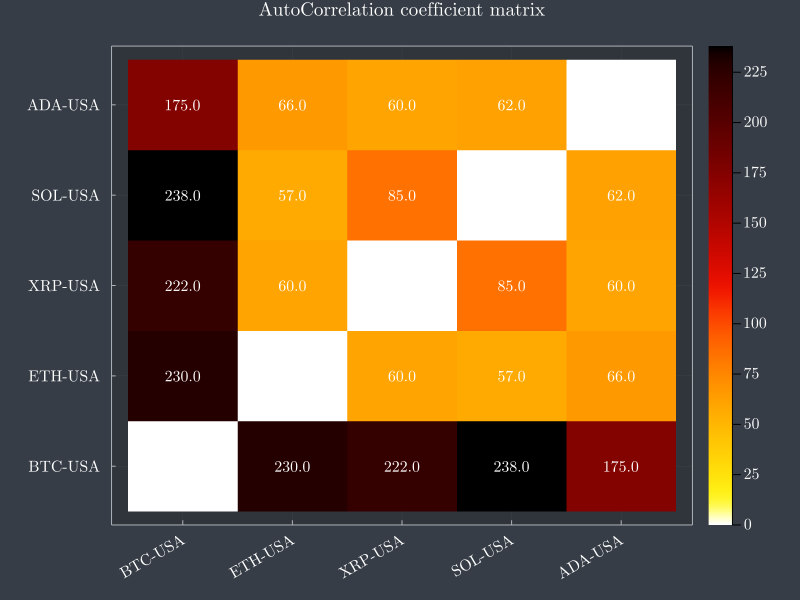

In [8]:
Symbols = ["BTC-USA", "ETH-USA", "XRP-USA", "SOL-USA", "ADA-USA"]
AutoCorPlot = begin
    StatsMods.matrixmap(Symbols, Symbols, ACMatix, annotationargs=(10, "Arial", :White), size=(800, 600), c=cgrad(rev=true))
    plot!(title="AutoCorrelation coefficient matrix", rightmargin=5mm, bottommargin=5mm, topmargin=5mm, leftmargin=5mm)
end
savefig(AutoCorPlot, FigsDir * "S5-AutoCorPlot.pdf")
display(AutoCorPlot)